In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pyproj

In [2]:
# # gw50m
answer_location = (52.53962045830213, 13.419884901364885, 50)
source_locations = [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1), (52.54022829654233, 13.424028618727982, 23), (52.53768690920158, 13.423827698593255, 19), (52.53701243697258, 13.41926365424317, 23), (52.53765506974833, 13.416535624425991, 23), (52.540951204354315, 13.414768595630743, 19), (52.53846109447526, 13.42080118586715, 23)]
rssi = np.array([-73.54774707124031, -67.2598116355535, -65.27220428570674, -74.73454353002585, -68.84323573826707, -70.71299630957999, -69.14659573310989, -69.70525715798875, -74.09346777134436, -63.18224654815296])
d = []
# rssi to distance with curve fit
for i in range(len(rssi)):
    d.append(10**((-18.67881 - rssi[i]) / (10 * 2.04002)))
print(d)

# gw100m
# answer_location = (52.53962045830213, 13.419884901364885, 100)
# source_locations = [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1), (52.54022829654233, 13.424028618727982, 23), (52.53768690920158, 13.423827698593255, 19), (52.53701243697258, 13.41926365424317, 23), (52.53765506974833, 13.416535624425991, 23), (52.540951204354315, 13.414768595630743, 19), (52.53846109447526, 13.42080118586715, 23)]
# rssi = np.array([-73.94630524200359, -67.04524365136507, -65.51133843649966, -71.99102431036357, -69.38046352414914, -70.69053819851595, -69.09353142802274, -69.9814290434943, -71.63403554811134, -63.81425676768592])
# d = []
# for i in range(len(rssi)):
#     d.append(10**((-18.67881 - rssi[i]) / (10 * 2.04002)))
# print(d)

# # gw100m_nobuilding
# answer_location = (52.53962045830213, 13.419884901364885, 200)
# source_locations = [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1), (52.54022829654233, 13.424028618727982, 23), (52.53768690920158, 13.423827698593255, 19), (52.53701243697258, 13.41926365424317, 23), (52.53765506974833, 13.416535624425991, 23), (52.540951204354315, 13.414768595630743, 19), (52.53846109447526, 13.42080118586715, 23)]
# rssi = np.array([-73.58976692127023, -66.84978429622258, -65.43775615882458, -68.51723739248007, -69.34638664552159, -70.67158737502467, -69.47921756875596, -69.74188545126589, -71.33057463016215, -63.86118311152556])
# d = []
# for i in range(len(rssi)):
#     d.append(10**((-18.67881 - rssi[i]) / (10 * 2.04002)))
# print(d)

[489.3588074217971, 240.65689095825144, 192.2947928449276, 559.5039227350577, 287.7506871248685, 355.36152157821056, 297.7740251687397, 317.15525160163276, 520.4489797985229, 151.88665572438723]


Receiver location: (52.53961999940998, 13.419607560685515, -133.13897713739425)
error to the truth in 3d 184.1031641205602
error to the truth in 2d 18.812530179363577
[(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1), (52.54022829654233, 13.424028618727982, 23), (52.53768690920158, 13.423827698593255, 19), (52.53701243697258, 13.41926365424317, 23), (52.53765506974833, 13.416535624425991, 23), (52.540951204354315, 13.414768595630743, 19), (52.53846109447526, 13.42080118586715, 23)]


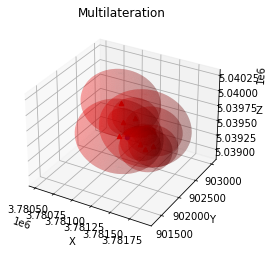

[ 33.79366256  22.10836683  48.8505824  256.28843466  57.1224691
  33.74798438  32.5547263   22.89042992 129.45278137  66.21578917]


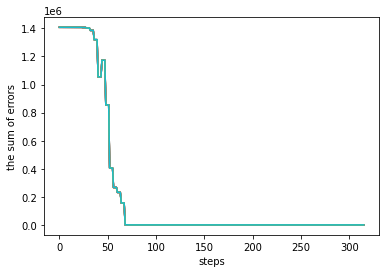

In [3]:
# multilateration program

errors_array = []

R = 6371000 # radius of the earth in meters

# GPS coordinates of the sources
# source_locations = [
#     (46.048174, 11.134445, 0),  # Source 1
#     (46.048275, 11.134562, 0),  # Source 2
#     (46.048389, 11.134393, 0),  # Source 3
#     (46.048431, 11.134557, 0)  # Source 4
# ]

# Distances from the receiver to the sources
# d = np.array([7.5, 7.2, 9.8, 9.4])

# Convert GPS coordinates to Cartesian coordinates
def to_cartesian(lat, lon, alt):
    x, y, z = pyproj.Transformer.from_crs(4979, 4978, always_xy=True).transform(lon, lat, alt)
    return x, y, z

# # Convert GPS coordinates to Cartesian coordinates
def to_cartesian_2d(lat, lon):
    # Calculate UTM zone from longitude
    zone = int((lon + 180) / 6) + 1
    # Determine if the point is in the Northern or Southern hemisphere
    hemisphere = 'north' if lat >= 0 else 'south'

    # define the coordinate systems
    transformer = pyproj.Transformer.from_crs("epsg:4326", f"epsg:326{zone if lat >= 0 else zone + 100}")

    x, y = transformer.transform(lat, lon)
    return x, y

# Convert Cartesian coordinates to GPS coordinates
def to_gps(x, y, z):
    lon, lat, alt = pyproj.Transformer.from_crs(4978,4979, always_xy=True).transform(x, y, z)
    return lat, lon, alt

# Calculate the distance between the receiver and each source
def distance(xyz_receiver, xyz_source):
    return np.linalg.norm(xyz_source - xyz_receiver)

# Objective function to minimize the sum of squared errors between estimated and actual distances
def error(xyz_receiver, xyz_sources, d):
    distances = np.linalg.norm(xyz_sources - xyz_receiver, axis=1)
    errors = distances - d
    errors_array.append(np.sqrt(errors**2))
    return np.sum(errors**2)

# Define a function to convert radians to degrees
def degrees(rad):
    return rad * 180 / np.pi

# Starting GPS coordinates of the receiver (can be anywhere)
receiver_location = (40.048174, 10.134445, 0)

# Convert the GPS coordinates of the sources and the receiver to Cartesian coordinates
xyz_sources = np.array([to_cartesian(*source_location) for source_location in source_locations])
xyz_receiver = np.array(to_cartesian(*receiver_location))

# Perform multilateration to estimate the location of the receiver
result = minimize(error, xyz_receiver, args=(xyz_sources, d))
xyz_receiver_estimated = result.x

# Convert the estimated Cartesian coordinates of the receiver back to GPS coordinates
receiver_location_estimated = to_gps(*xyz_receiver_estimated)

print('Receiver location:', receiver_location_estimated)
print('error to the truth in 3d', np.linalg.norm(to_cartesian(*answer_location)-xyz_receiver_estimated))
print('error to the truth in 2d', np.linalg.norm(np.array(to_cartesian_2d(*answer_location[:2])) - np.array(to_cartesian_2d(*receiver_location_estimated[:2]))))

# Plot the sources and the estimated location of the receiver
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the sources
for i in range(len(source_locations)):
    x, y, z = to_cartesian(*source_locations[i])
    ax.scatter(x, y, z, color='r', marker='^')

# Plot the estimated location of the receiver
x, y, z = to_cartesian(*receiver_location_estimated)
ax.scatter(x, y, z, color='b', marker='o')

# Set the labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Multilateration')

print(source_locations)
# Plot circles (or spheres) representing the distance from each source
for i in range(len(source_locations)):
    # Calculate the radius of the circle (or sphere) in meters
    radius = d[i]
    # Get the Cartesian coordinates of the source
    x, y, z = to_cartesian(*source_locations[i])
    # Create a grid of points on the surface of the sphere
    # Sphere in 3D
    u = np.linspace(0, 2*np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    X = x + radius*np.outer(np.cos(u), np.sin(v))
    Y = y + radius*np.outer(np.sin(u), np.sin(v))
    Z = z + radius*np.outer(np.ones_like(u), np.cos(v))
    ax.plot_surface(X, Y, Z, color='r', alpha=0.2)

plt.show()

# create a figure for error
fig = plt.figure()

plt.plot(errors_array)
plt.xlabel("steps")
plt.ylabel("the sum of errors")
print(errors_array[-1])

# show the plot
plt.show()

import folium

# Plot the sources and the estimated location of the receiver on a 2D map
m = folium.Map(location=receiver_location_estimated[:2], zoom_start=17, max_zoom=20)

# Plot the sources
for i in range(len(source_locations)):
    folium.Marker(location=source_locations[i][:2]).add_to(m)

# Plot the estimated location of the receiver
folium.Marker(location=receiver_location_estimated[:2], icon=folium.Icon(color='purple')).add_to(m)

# answer
folium.Marker(location=answer_location[:2], icon=folium.Icon(color='green')).add_to(m)

# Plot circles representing the distance from each source
for i in range(len(source_locations)):
    # Calculate the radius of the circle in meters
    radius = d[i]
    # Get the location of the source
    source_location = source_locations[i][:2]
    # Draw the circle on the map
    folium.Circle(location=source_location, radius=radius, color='red', fill=False).add_to(m)

m



In [4]:
# create every pattern of 4 or more beacons
import itertools

source_locations_iter = []
d_iter = []
for n in range(4,len(source_locations)+1):
	for source_location in itertools.combinations(source_locations, n):
	    source_locations_iter.append(list(source_location))
	    
for n in range(4,len(d)+1):
	for d_i in itertools.combinations(d, n):
	    d_iter.append(list(d_i))
print(source_locations_iter)
print(d_iter)

[[(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53863682156572, 13.423243543905807, 5.1)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.54022829654233, 13.424028618727982, 23)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53768690920158, 13.423827698593255, 19)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53701243697258, 13.41926365424317, 23)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715658, 13.42007143605056, 23), (52.53765506974833, 13.416535624425991, 23)], [(52.542509627168, 13.42523777393717, 23), (52.538449358627645, 13.417154706545864, 23), (52.54124707715

[[50.81203554928499, 241.4083491454148, 4, 26.553036651309164, 18.812530179363577], [2.194332891837611, 35.99188656909818, 4, 1.0437881554311204, 241.16978045913606], [0.15674773423226185, 103.82428559776528, 4, 0.056071984914510146, 7.58232136156802], [1.99419672316683, 38.1357762767227, 4, 0.34153048754074766, 5.410518250556096], [2.799243658323789, 37.22101174409066, 4, 2.070151448666035, 5.060782425508497], [37.34399760772827, 91.98375297892785, 4, 15.13802369404402, 1.7247112823108983], [1.91352226733472, 90.81373618969633, 4, 0.701692905758133, 88.82688174298487], [77.05301467222479, 190.76249503938425, 4, 47.056218830503404, 5.929285508947809], [89.17180466255401, 162.47861735314413, 4, 55.820099195527966, 190.71119198632755], [79.05950477433981, 182.72291228609467, 4, 41.82148726038608, 118.25348917932577], [59.00933118560293, 224.8185886831793, 4, 24.449955913325624, 179.63903601043498], [111.6560051582084, 333.26028066712126, 4, 20.36079085888821, 224.51426550636128], [86.463

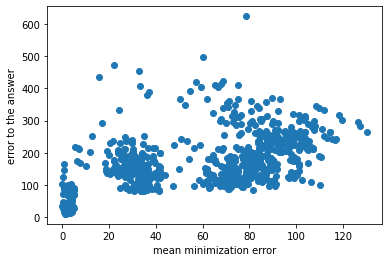

In [5]:
# multilateration with every patterns

errors_array = []

R = 6371000 # radius of the earth in meters

# GPS coordinates of the sources
# source_locations = [
#     (46.048174, 11.134445, 0),  # Source 1
#     (46.048275, 11.134562, 0),  # Source 2
#     (46.048389, 11.134393, 0),  # Source 3
#     (46.048431, 11.134557, 0)  # Source 4
# ]

# Distances from the receiver to the sources
# d = np.array([7.5, 7.2, 9.8, 9.4])

# Convert GPS coordinates to Cartesian coordinates
def to_cartesian(lat, lon, alt):
    x, y, z = pyproj.Transformer.from_crs(4979, 4978, always_xy=True).transform(lon, lat, alt)
    return x, y, z

# Convert Cartesian coordinates to GPS coordinates
def to_gps(x, y, z):
    lon, lat, alt = pyproj.Transformer.from_crs(4978,4979, always_xy=True).transform(x, y, z)
    return lat, lon, alt

# Calculate the distance between the receiver and each source
def distance(xyz_receiver, xyz_source):
    return np.linalg.norm(xyz_source - xyz_receiver)

# Objective function to minimize the sum of squared errors between estimated and actual distances
def error(xyz_receiver, xyz_sources, d):
    distances = np.linalg.norm(xyz_sources - xyz_receiver, axis=1)
    errors = distances - d
    errors_array.append(np.sqrt(errors**2))
    return np.sum(errors**2)

# Define a function to convert radians to degrees
def degrees(rad):
    return rad * 180 / np.pi

xyz_receiver_estimated_list = []
receiver_locations_estimated = []
error_answer_minimization = []

for i in range(len(d_iter)):

    source_locations = source_locations_iter[i]
    distance = d_iter[i]

    # Starting GPS coordinates of the receiver (can be anywhere)
    receiver_location = (40.048174, 10.134445, 0)

    # Convert the GPS coordinates of the sources and the receiver to Cartesian coordinates
    xyz_sources = np.array([to_cartesian(*source_location) for source_location in source_locations])
    xyz_receiver = np.array(to_cartesian(*receiver_location))

    # Perform multilateration to estimate the location of the receiver
    result = minimize(error, xyz_receiver, args=(xyz_sources, distance))
    xyz_receiver_estimated = result.x
    xyz_receiver_estimated_list.append(xyz_receiver_estimated)

    error_answer = np.linalg.norm(to_cartesian(*answer_location)-xyz_receiver_estimated)
    error_answer_2d = np.linalg.norm(np.array(to_cartesian_2d(*answer_location[:2])) - np.array(to_cartesian_2d(*receiver_location_estimated[:2])))
    error_answer_minimization.append([np.mean(errors_array[-1]), error_answer, len(distance), np.std(errors_array[-1]), error_answer_2d])

    # Convert the estimated Cartesian coordinates of the receiver back to GPS coordinates
    receiver_location_estimated = to_gps(*xyz_receiver_estimated)
    receiver_locations_estimated.append(receiver_location_estimated)

    # print('Receiver location:', xyz_receiver_estimated)
    # print('Receiver location:', receiver_location_estimated)
    # print('error', np.sum(errors_array[-1]))

print(error_answer_minimization)
error_answer_minimization.sort(key=lambda item: item[0])
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error")
plt.ylabel("error to the answer")
plt.show()

import folium

# Plot the sources and the estimated location of the receiver on a 2D map
m = folium.Map(location=receiver_location_estimated[:2], zoom_start=18, max_zoom=20)

# Plot the sources
for i in range(len(source_locations)):
    folium.Marker(location=source_locations[i][:2]).add_to(m)

for i in range(len(receiver_locations_estimated)):
# Plot the estimated location of the receiver
    folium.Marker(location=receiver_locations_estimated[i][:2], icon=folium.Icon(color='purple'), tooltip=f'Point {i}').add_to(m)

# answer
folium.Marker(location=answer_location[:2], icon=folium.Icon(color='green')).add_to(m)

# Plot circles representing the distance from each source
for i in range(len(source_locations)):
    # Calculate the radius of the circle in meters
    radius = d[i]
    # Get the location of the source
    source_location = source_locations[i][:2]
    # Draw the circle on the map
    folium.Circle(location=source_location, radius=radius, color='red', fill=False).add_to(m)

m



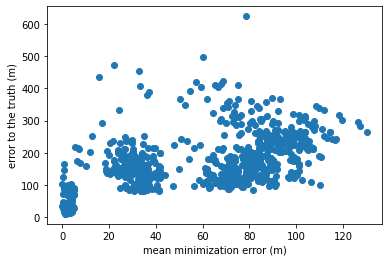

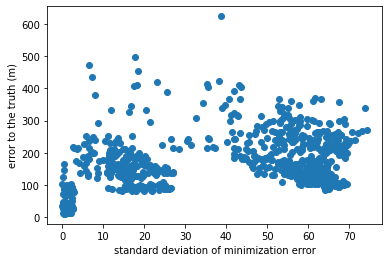

[]
[[35.488069589969236, 103.82428559776528, 73.3205498979384, 30.94115744106893, 46.74242854847433, 124.81896877816051, 27.183568550263658, 33.66501819210521, 27.799676687583958, 38.253762304551515, 87.52152363352252, 165.67704948375663, 88.51514487540489, 28.958610152593433, 90.05283601015276, 15.3129463664528, 29.745632731856425, 146.3892650860451, 18.808133680360992, 44.0676575156997, 98.43747941054639, 13.851015533759238, 35.373361417919305, 10.287266419843764, 27.85876792805793, 30.638532796078707, 34.68029411092666, 32.971559958648285, 90.81373618969633, 38.1357762767227, 44.26084035270863, 35.99188656909818, 29.272450682144676, 76.63123789573893, 79.31864670923835, 26.914577479866978, 67.01707886481412, 96.92593689853481, 96.14795263441137, 26.957473676174434, 24.92641438589529, 80.21454528903654, 87.12144239180863, 32.93915108427891, 18.18075256149082, 25.47961348107671, 99.59819011782298, 37.22101174409066, 100.85107116873186, 48.46862630550479, 83.47664301168427, 43.41213205

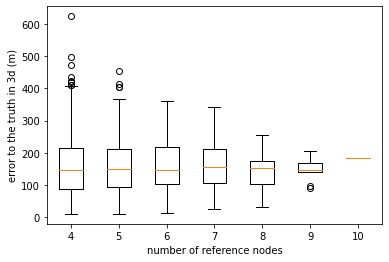

[]
[[81.60623567757976, 7.58232136156802, 112.91008063347913, 100.30251174487702, 103.08697019607395, 118.090296578136, 84.25603417682628, 6.515386146079176, 92.36146219523417, 101.72950799908622, 77.69569521531454, 3.032261165853537, 89.26108579175441, 92.61652619647344, 80.07275072612596, 6.479878189831495, 5.895105465608782, 122.44375640664143, 121.72346599650305, 7.107755419623982, 135.7554742950626, 143.65078219301205, 4.586566078544152, 72.20197651827262, 112.39442037511029, 6.939352919824459, 5.9895739552901155, 71.62191606492152, 88.82688174298487, 5.410518250556096, 12.000879014659771, 241.16978045913606, 52.75045404273339, 3.012383792302143, 80.08183663286391, 84.02889769471994, 8.914898852055291, 130.80845801499868, 2.0620215899290897, 9.155816624014044, 87.65336396110995, 83.16072574572809, 84.83458005964974, 1.7771241653688403, 142.07378545981962, 254.10627751655392, 1.4647789563342843, 5.060782425508497, 180.1892103994362, 11.778702804287027, 11.970223197402222, 8.4693208

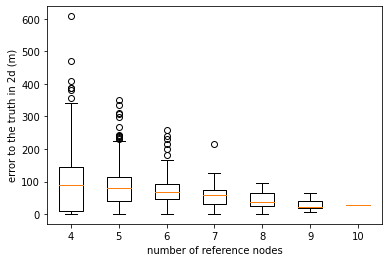

[]
[[0.11700456099272571, 0.15674773423226185, 0.359170910092935, 0.3702423355257167, 0.3955465893044945, 0.45612771745199865, 0.46878915216097994, 0.5284165545674853, 0.5989073081811327, 0.6548565576300831, 0.7044732936046927, 0.7375875982139277, 0.7660763785468276, 0.8064762154105338, 0.8087967817408312, 0.8771883861691023, 0.9269618750506368, 0.9670512395414477, 0.9869402672039485, 1.4909717026788485, 1.5505783770743733, 1.5630240273914566, 1.633022422968871, 1.66042754955469, 1.6920383912386612, 1.7703948849900044, 1.8493861799338092, 1.8962673151295775, 1.91352226733472, 1.99419672316683, 2.141357295041665, 2.194332891837611, 2.241745963981714, 2.3305192643937076, 2.359582736016307, 2.424146260842427, 2.447811179480979, 2.553742045605013, 2.6218876005522063, 2.633230101125257, 2.6406221327865538, 2.6528841237499705, 2.655265614418248, 2.6691954355891596, 2.7291721643973617, 2.756979210392288, 2.75715654354736, 2.799243658323789, 2.8093930628711234, 2.9706139164904712, 3.0251654151

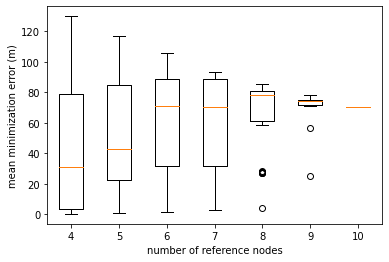

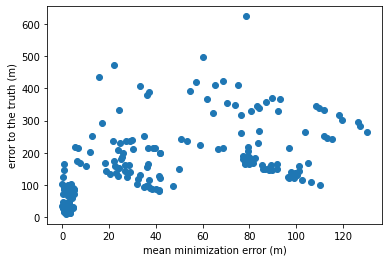

In [6]:
# visualization of multilateration with every pattern
# the relation between error to the truth and mean minimization error, number of reference nodes
error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("mean minimization error (m)")
plt.ylabel("error to the truth (m)")

#find line of best fit
a, b = np.polyfit([item[0] for item in error_answer_minimization], [item[1] for item in error_answer_minimization], 1)

#add line of best fit to plot
# plt.plot(np.array([item[0] for item in error_answer_minimization]), a*np.array([item[0] for item in error_answer_minimization])+b)    
plt.show()

error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[3] for item in error_answer_minimization], [item[1] for item in error_answer_minimization])
plt.xlabel("standard deviation of minimization error")
plt.ylabel("error to the truth (m)")

#find line of best fit
a, b = np.polyfit([item[3] for item in error_answer_minimization], [item[1] for item in error_answer_minimization], 1)

#add line of best fit to plot
# plt.plot(np.array([item[0] for item in error_answer_minimization]), a*np.array([item[0] for item in error_answer_minimization])+b)    
plt.show()

plt.figure(facecolor="white")
error_answer_reference_boxplot = [[] for _ in range(20)]
print(error_answer_reference_boxplot[0])

for i in range(len(error_answer_minimization)):
    error_answer_reference_boxplot[error_answer_minimization[i][2]-4].append(error_answer_minimization[i][1])
print(error_answer_reference_boxplot)
plt.boxplot(error_answer_reference_boxplot[:7])
plt.xticks([i for i in range(1,8)],[i for i in range(4,11)])
plt.xlabel("number of reference nodes")
plt.ylabel("error to the truth in 3d (m)")
plt.show()

plt.figure(facecolor="white")
error_answer_reference_boxplot = [[] for _ in range(20)]
print(error_answer_reference_boxplot[0])

for i in range(len(error_answer_minimization)):
    error_answer_reference_boxplot[error_answer_minimization[i][2]-4].append(error_answer_minimization[i][4])
print(error_answer_reference_boxplot)
plt.boxplot(error_answer_reference_boxplot[:7])
plt.xticks([i for i in range(1,8)],[i for i in range(4,11)])
plt.xlabel("number of reference nodes")
plt.ylabel("error to the truth in 2d (m)")
plt.show()

plt.figure(facecolor="white")
error_answer_reference_boxplot = [[] for _ in range(20)]
print(error_answer_reference_boxplot[0])

for i in range(len(error_answer_minimization)):
    error_answer_reference_boxplot[error_answer_minimization[i][2]-4].append(error_answer_minimization[i][0])
print(error_answer_reference_boxplot)
plt.boxplot(error_answer_reference_boxplot[:7])
plt.xticks([i for i in range(1,8)],[i for i in range(4,11)])
plt.xlabel("number of reference nodes")
plt.ylabel("mean minimization error (m)")
plt.show()


error_answer_minimization.sort(key=lambda item: item[0])
plt.figure(facecolor="white")
plt.scatter([item[0] for item in error_answer_minimization if item[2]==4], [item[1] for item in error_answer_minimization if item[2]==4])
plt.xlabel("mean minimization error (m)")
plt.ylabel("error to the truth (m)")  
plt.show()

In [7]:
error_answer_minimization[-1]

[130.02559321495872,
 265.24667456825665,
 4,
 53.10450622808938,
 165.95699646762367]